In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Creating a SparkSession
spark = SparkSession.builder.appName("Railroads") \
                       .getOrCreate()

In [2]:
df = spark.read.parquet("rail_data_cleaned_20230728132300.parquet")
df

DataFrame[route_id: string, unique_id: string, service_start_date: string, update_origin: string, train_platform: string, working_time_pass: timestamp_ntz, working_time_arrival: timestamp_ntz, working_time_departure: timestamp_ntz, planned_time_arrival: timestamp_ntz, planned_time_departure: timestamp_ntz, pass: int, platform: string, train_length: string, actual_arrival_time: timestamp_ntz, actual_departure_time: timestamp_ntz, is_delayed_arrival: boolean, is_delayed_departure: boolean, __index_level_0__: bigint]

In [3]:
def show_missing(df):
    # Show the count of missing or NaN values for each column
    missing_values = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns])
    print('Total rows', df.count())
    missing_values.show(vertical=True)
show_missing(df)

Total rows 37100
-RECORD 0-----------------------
 route_id               | 0     
 unique_id              | 0     
 service_start_date     | 0     
 update_origin          | 585   
 train_platform         | 0     
 working_time_pass      | 37100 
 working_time_arrival   | 0     
 working_time_departure | 0     
 planned_time_arrival   | 3245  
 planned_time_departure | 3520  
 pass                   | 37100 
 platform               | 2986  
 train_length           | 26505 
 actual_arrival_time    | 5331  
 actual_departure_time  | 2716  
 is_delayed_arrival     | 0     
 is_delayed_departure   | 0     
 __index_level_0__      | 0     



In [4]:
#df.exceptAll(df.dropDuplicates()).show()

In [5]:
#df.groupBy(df.columns)\
    #.count()\
    #.where(F.col('count') > 1)\
    #.select(F.sum('count'))\
    #.show()

In [6]:
df.printSchema()

root
 |-- route_id: string (nullable = true)
 |-- unique_id: string (nullable = true)
 |-- service_start_date: string (nullable = true)
 |-- update_origin: string (nullable = true)
 |-- train_platform: string (nullable = true)
 |-- working_time_pass: timestamp_ntz (nullable = true)
 |-- working_time_arrival: timestamp_ntz (nullable = true)
 |-- working_time_departure: timestamp_ntz (nullable = true)
 |-- planned_time_arrival: timestamp_ntz (nullable = true)
 |-- planned_time_departure: timestamp_ntz (nullable = true)
 |-- pass: integer (nullable = true)
 |-- platform: string (nullable = true)
 |-- train_length: string (nullable = true)
 |-- actual_arrival_time: timestamp_ntz (nullable = true)
 |-- actual_departure_time: timestamp_ntz (nullable = true)
 |-- is_delayed_arrival: boolean (nullable = true)
 |-- is_delayed_departure: boolean (nullable = true)
 |-- __index_level_0__: long (nullable = true)



In [7]:
df = df.drop(*['pass','working_time_pass','__index_level_0__']) 
df.show()

+---------------+---------+------------------+-------------+--------------+--------------------+----------------------+--------------------+----------------------+--------+------------+-------------------+---------------------+------------------+--------------------+
|       route_id|unique_id|service_start_date|update_origin|train_platform|working_time_arrival|working_time_departure|planned_time_arrival|planned_time_departure|platform|train_length|actual_arrival_time|actual_departure_time|is_delayed_arrival|is_delayed_departure|
+---------------+---------+------------------+-------------+--------------+--------------------+----------------------+--------------------+----------------------+--------+------------+-------------------+---------------------+------------------+--------------------+
|202307277679020|   L79020|        2023-07-27|       Darwin|          STFD| 2023-07-27 00:03:00|   2023-07-27 00:03:30|                NULL|                  NULL|       5|        NULL|2023-07-27 

In [8]:
def show_missing(df):
    # Show the count of missing or NaN values for each column
    missing_values = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns])
    print('Total rows', df.count())
    missing_values.show(vertical=True)
show_missing(df)

Total rows 37100
-RECORD 0-----------------------
 route_id               | 0     
 unique_id              | 0     
 service_start_date     | 0     
 update_origin          | 585   
 train_platform         | 0     
 working_time_arrival   | 0     
 working_time_departure | 0     
 planned_time_arrival   | 3245  
 planned_time_departure | 3520  
 platform               | 2986  
 train_length           | 26505 
 actual_arrival_time    | 5331  
 actual_departure_time  | 2716  
 is_delayed_arrival     | 0     
 is_delayed_departure   | 0     



In [9]:
# drop rows with missing train_length
df = df.na.drop(subset=["train_length","actual_arrival_time","actual_departure_time","planned_time_arrival","planned_time_departure","platform","update_origin"])
show_missing(df)

Total rows 7207
-RECORD 0---------------------
 route_id               | 0   
 unique_id              | 0   
 service_start_date     | 0   
 update_origin          | 0   
 train_platform         | 0   
 working_time_arrival   | 0   
 working_time_departure | 0   
 planned_time_arrival   | 0   
 planned_time_departure | 0   
 platform               | 0   
 train_length           | 0   
 actual_arrival_time    | 0   
 actual_departure_time  | 0   
 is_delayed_arrival     | 0   
 is_delayed_departure   | 0   



In [10]:
df.dropDuplicates()
df.show()

+---------------+---------+------------------+-------------+--------------+--------------------+----------------------+--------------------+----------------------+--------+------------+-------------------+---------------------+------------------+--------------------+
|       route_id|unique_id|service_start_date|update_origin|train_platform|working_time_arrival|working_time_departure|planned_time_arrival|planned_time_departure|platform|train_length|actual_arrival_time|actual_departure_time|is_delayed_arrival|is_delayed_departure|
+---------------+---------+------------------+-------------+--------------+--------------------+----------------------+--------------------+----------------------+--------+------------+-------------------+---------------------+------------------+--------------------+
|202307287155736|   G55736|        2023-07-28|          CIS|       BHAMMRS| 2023-07-28 10:13:00|   2023-07-28 10:15:00| 2023-07-28 10:13:00|   2023-07-28 10:15:00|       1|           2|2023-07-28 

In [11]:
df.printSchema()

root
 |-- route_id: string (nullable = true)
 |-- unique_id: string (nullable = true)
 |-- service_start_date: string (nullable = true)
 |-- update_origin: string (nullable = true)
 |-- train_platform: string (nullable = true)
 |-- working_time_arrival: timestamp_ntz (nullable = true)
 |-- working_time_departure: timestamp_ntz (nullable = true)
 |-- planned_time_arrival: timestamp_ntz (nullable = true)
 |-- planned_time_departure: timestamp_ntz (nullable = true)
 |-- platform: string (nullable = true)
 |-- train_length: string (nullable = true)
 |-- actual_arrival_time: timestamp_ntz (nullable = true)
 |-- actual_departure_time: timestamp_ntz (nullable = true)
 |-- is_delayed_arrival: boolean (nullable = true)
 |-- is_delayed_departure: boolean (nullable = true)



In [12]:
for columns in df.columns:
    df.select(columns).distinct().show()

+---------------+
|       route_id|
+---------------+
|202307278024592|
|202307277684886|
|202307278070469|
|202307277683900|
|202307277683740|
|202307277194734|
|202307277674757|
|202307278027471|
|202307287194101|
|202307277682981|
|202307278070522|
|202307277614110|
|202307277195060|
|202307278071729|
|202307278951683|
|202307277673921|
|202307287156234|
|202307277196534|
|202307287156262|
|202307277684208|
+---------------+
only showing top 20 rows

+---------+
|unique_id|
+---------+
|   C18264|
|   P71715|
|   G67331|
|   P70564|
|   G59465|
|   P24503|
|   P27235|
|   L13459|
|   G96634|
|   L83604|
|   G55860|
|   L83861|
|   G81797|
|   G41978|
|   P24704|
|   Y54037|
|   G67393|
|   L84195|
|   G94785|
|   G67196|
+---------+
only showing top 20 rows

+------------------+
|service_start_date|
+------------------+
|        2023-07-27|
|        2023-07-28|
+------------------+

+-------------+
|update_origin|
+-------------+
|           TD|
|        Trust|
|       Darwin|
|    

In [13]:
df2 = spark.read.csv("RailReferences.csv", header=True, inferSchema=True)

In [14]:
df2.show()

+-----------+----------+-------+--------------------+---------------+--------+-------+--------+-------------------+--------------------+--------------+------------+
|   AtcoCode|TiplocCode|CrsCode|         StationName|StationNameLang|GridType|Easting|Northing|   CreationDateTime|ModificationDateTime|RevisionNumber|Modification|
+-----------+----------+-------+--------------------+---------------+--------+-------+--------+-------------------+--------------------+--------------+------------+
|9100PENZNCE|   PENZNCE|    PNZ|Penzance Rail Sta...|           NULL|       U| 147588|   30599|2003-11-04 00:00:00| 2011-09-30 14:47:28|             2|         rev|
| 9100STIVES|    STIVES|    SIV|St Ives (Cornwall...|           NULL|       U| 151947|   40127|2005-04-04 00:00:00| 2011-09-30 14:47:28|             4|         rev|
|9100CARBISB|   CARBISB|    CBB|Carbis Bay Rail S...|           NULL|       U| 152930|   38745|2003-11-04 00:00:00| 2011-09-30 14:47:28|             5|         rev|
| 9100STER

In [15]:
df2 = df2.drop(*["StationNameLang","GridType","AtcoCode","Modification","CreationDateTime","ModificationDateTime","RevisionNumber","CrsCode"])
df2.show()

+----------+--------------------+-------+--------+
|TiplocCode|         StationName|Easting|Northing|
+----------+--------------------+-------+--------+
|   PENZNCE|Penzance Rail Sta...| 147588|   30599|
|    STIVES|St Ives (Cornwall...| 151947|   40127|
|   CARBISB|Carbis Bay Rail S...| 152930|   38745|
|    STERTH|St Erth Rail Station| 154150|   35730|
|   LELANTS|Lelant Saltings R...| 154430|   36640|
|    LELANT| Lelant Rail Station| 154770|   37220|
|     HAYLE|  Hayle Rail Station| 155970|   37325|
|    CBORNE|Camborne Rail Sta...| 164830|   39696|
|   ARISAIG|Arisaig Rail Station| 166400|  786700|
|     MLAIG|Mallaig Rail Station| 167560|  797060|
|     MORAR|  Morar Rail Station| 167800|  793000|
|   REDRUTH|Redruth Rail Station| 170040|   42009|
|   BEASDAL|Beasdale Rail Sta...| 170900|  785000|
|   KYLELSH|Kyle of Lochalsh ...| 176247|  827123|
|   LCHALRT|Lochailort Rail S...| 176900|  782600|
|   DUIRNSH|Duirinish Rail St...| 177845|  831521|
|      PRYN| Penryn Rail Statio

In [16]:
join_df = df.join(df2,
               df.train_platform == df2.TiplocCode, 
               "left")

In [17]:
join_df.show()

+---------------+---------+------------------+-------------+--------------+--------------------+----------------------+--------------------+----------------------+--------+------------+-------------------+---------------------+------------------+--------------------+----------+--------------------+-------+--------+
|       route_id|unique_id|service_start_date|update_origin|train_platform|working_time_arrival|working_time_departure|planned_time_arrival|planned_time_departure|platform|train_length|actual_arrival_time|actual_departure_time|is_delayed_arrival|is_delayed_departure|TiplocCode|         StationName|Easting|Northing|
+---------------+---------+------------------+-------------+--------------+--------------------+----------------------+--------------------+----------------------+--------+------------+-------------------+---------------------+------------------+--------------------+----------+--------------------+-------+--------+
|202307287155736|   G55736|        2023-07-28|   

In [45]:
join_df.write.csv('CleandRailData.csv', mode='overwrite')

In [19]:
df_pd = join_df.toPandas()

In [20]:
df_pd.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,train_length,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure,TiplocCode,StationName,Easting,Northing
0,202307287155736,G55736,2023-07-28,CIS,BHAMMRS,2023-07-28 10:13:00,2023-07-28 10:15:00,2023-07-28 10:13:00,2023-07-28 10:15:00,1,2,2023-07-28 10:13:00,2023-07-28 10:15:00,False,False,BHAMMRS,Birmingham Moor Street Rail Station,407400.0,286800.0
1,202307287155736,G55736,2023-07-28,CIS,SOLIHUL,2023-07-28 10:22:30,2023-07-28 10:23:30,2023-07-28 10:23:00,2023-07-28 10:23:00,1,2,2023-07-28 10:23:00,2023-07-28 10:23:00,False,False,SOLIHUL,Solihull Rail Station,414490.0,279620.0
2,202307287155736,G55736,2023-07-28,CIS,DORIDGE,2023-07-28 10:27:30,2023-07-28 10:28:30,2023-07-28 10:28:00,2023-07-28 10:28:00,1,2,2023-07-28 10:28:00,2023-07-28 10:28:00,False,False,DORIDGE,Dorridge Rail Station,416920.0,274920.0
3,202307287155736,G55736,2023-07-28,CIS,WARWPWY,2023-07-28 10:37:00,2023-07-28 10:38:30,2023-07-28 10:37:00,2023-07-28 10:38:00,1,2,2023-07-28 10:37:00,2023-07-28 10:38:00,False,False,WARWPWY,Warwick Parkway Rail Station,426560.0,265400.0
4,202307287155736,G55736,2023-07-28,CIS,WARWICK,2023-07-28 10:41:00,2023-07-28 10:42:30,2023-07-28 10:41:00,2023-07-28 10:42:00,2,2,2023-07-28 10:41:00,2023-07-28 10:42:00,False,False,WARWICK,Warwick Rail Station,428620.0,265460.0


In [21]:
df_pd = df_pd.drop(["TiplocCode"],axis = 1)

In [22]:
df_pd.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,train_length,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure,StationName,Easting,Northing
0,202307287155736,G55736,2023-07-28,CIS,BHAMMRS,2023-07-28 10:13:00,2023-07-28 10:15:00,2023-07-28 10:13:00,2023-07-28 10:15:00,1,2,2023-07-28 10:13:00,2023-07-28 10:15:00,False,False,Birmingham Moor Street Rail Station,407400.0,286800.0
1,202307287155736,G55736,2023-07-28,CIS,SOLIHUL,2023-07-28 10:22:30,2023-07-28 10:23:30,2023-07-28 10:23:00,2023-07-28 10:23:00,1,2,2023-07-28 10:23:00,2023-07-28 10:23:00,False,False,Solihull Rail Station,414490.0,279620.0
2,202307287155736,G55736,2023-07-28,CIS,DORIDGE,2023-07-28 10:27:30,2023-07-28 10:28:30,2023-07-28 10:28:00,2023-07-28 10:28:00,1,2,2023-07-28 10:28:00,2023-07-28 10:28:00,False,False,Dorridge Rail Station,416920.0,274920.0
3,202307287155736,G55736,2023-07-28,CIS,WARWPWY,2023-07-28 10:37:00,2023-07-28 10:38:30,2023-07-28 10:37:00,2023-07-28 10:38:00,1,2,2023-07-28 10:37:00,2023-07-28 10:38:00,False,False,Warwick Parkway Rail Station,426560.0,265400.0
4,202307287155736,G55736,2023-07-28,CIS,WARWICK,2023-07-28 10:41:00,2023-07-28 10:42:30,2023-07-28 10:41:00,2023-07-28 10:42:00,2,2,2023-07-28 10:41:00,2023-07-28 10:42:00,False,False,Warwick Rail Station,428620.0,265460.0


In [23]:
df_pd.to_csv('output_cleaned_data.csv', index = False)

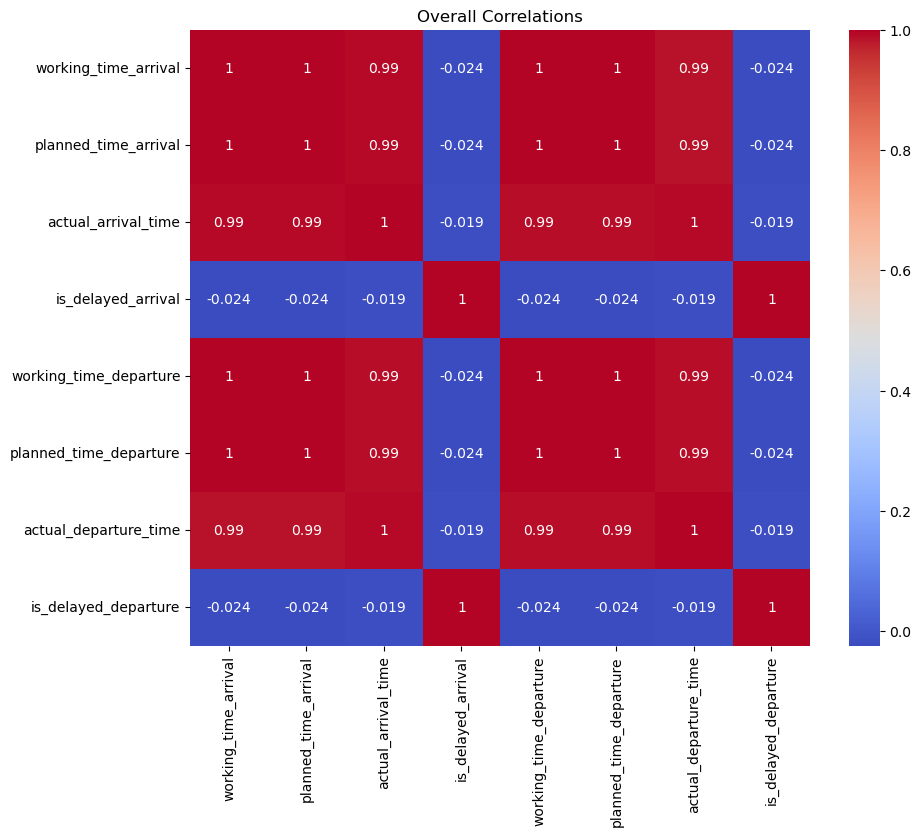

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pandas_df = df.select("working_time_arrival", "planned_time_arrival", "actual_arrival_time",
                      "is_delayed_arrival", "working_time_departure", "planned_time_departure",
                      "actual_departure_time", "is_delayed_departure").toPandas()

correlations = pandas_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Overall Correlations')
plt.show()

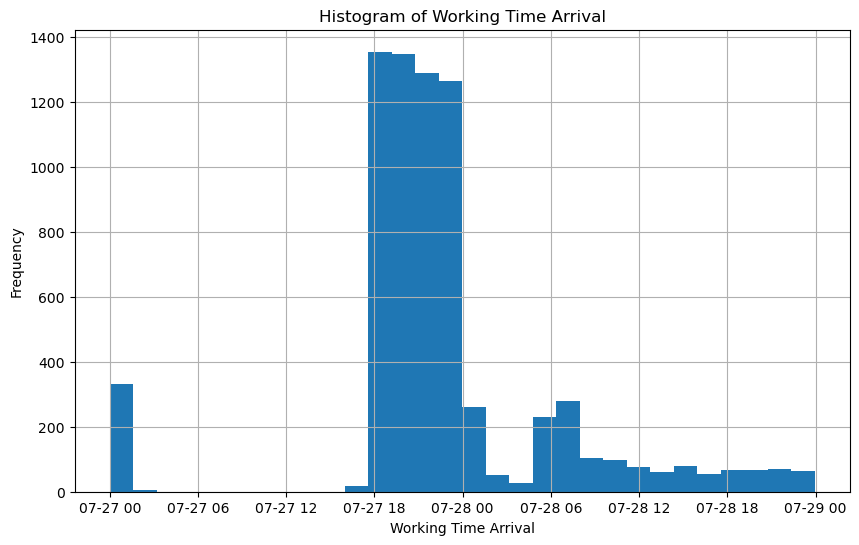

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pandas_df['working_time_arrival'].hist(bins=30)
plt.title('Histogram of Working Time Arrival')
plt.xlabel('Working Time Arrival')
plt.ylabel('Frequency')
plt.show()

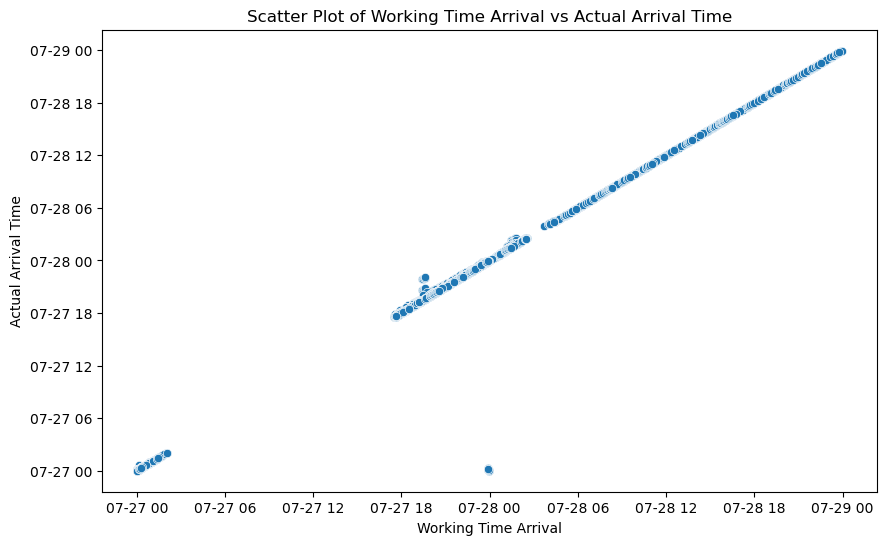

In [26]:
import seaborn as sns

# Scatter plot for working_time_arrival vs actual_arrival_time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='working_time_arrival', y='actual_arrival_time', data=pandas_df)
plt.title('Scatter Plot of Working Time Arrival vs Actual Arrival Time')
plt.xlabel('Working Time Arrival')
plt.ylabel('Actual Arrival Time')
plt.show()

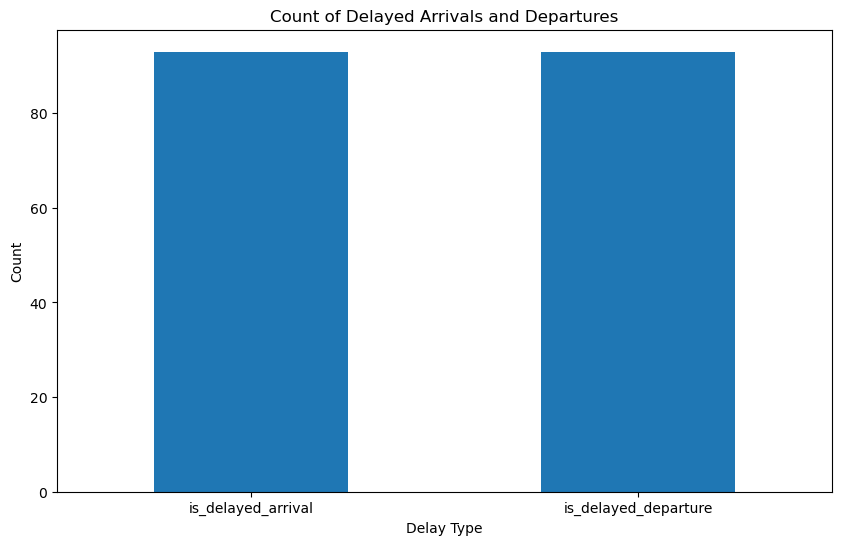

In [27]:
# Bar chart for delay status
delay_counts = pandas_df[['is_delayed_arrival', 'is_delayed_departure']].sum()

plt.figure(figsize=(10, 6))
delay_counts.plot(kind='bar')
plt.title('Count of Delayed Arrivals and Departures')
plt.xlabel('Delay Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
Analysis Visualizations:

Is there a correlation between the delays in arrival and departure times?

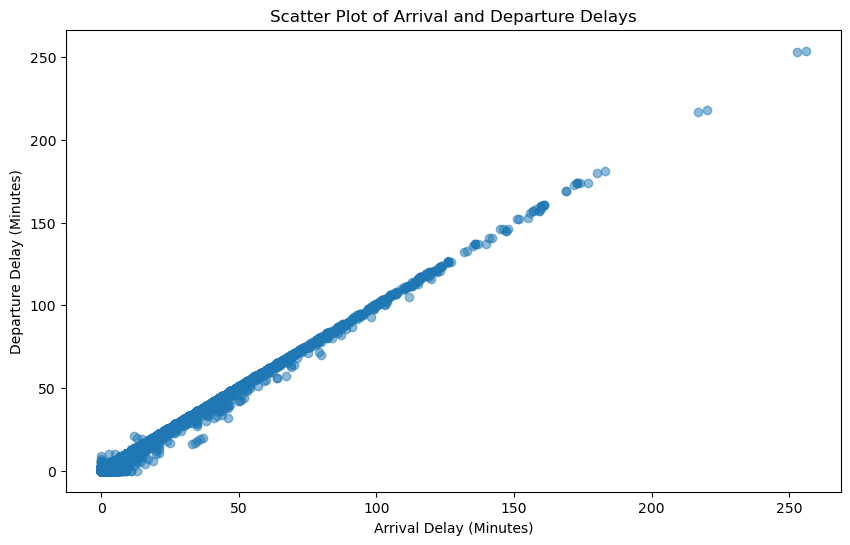

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleanRailData.csv')

# Create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['delayed_arrival_min'], df['delayed_departure_min'], alpha=0.5)
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Departure Delay (Minutes)')
plt.title('Scatter Plot of Arrival and Departure Delays')
plt.show()

In [52]:
import pandas as pd

# Calculate the correlation coefficient
correlation_coefficient = df['delayed_arrival_min'].corr(df['delayed_departure_min'])

print(f'Correlation coefficient between delayed_arrival_min and delayed_departure_min: {correlation_coefficient:.2f}')

Correlation coefficient between delayed_arrival_min and delayed_departure_min: 1.00


Corrrealtion map using heatmap and take all the columns in the data to see correlation


In [40]:
df = pd.read_csv('cleanRailData.csv')

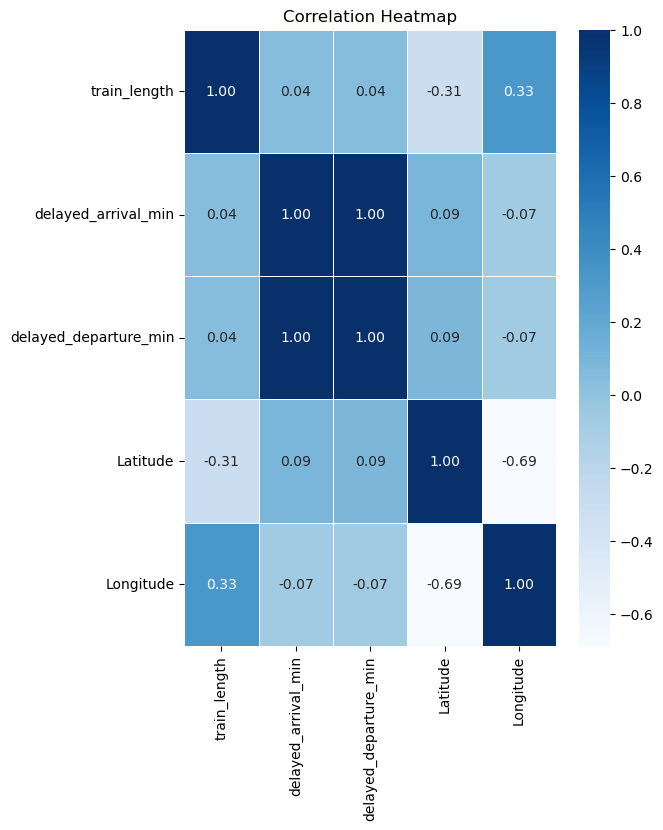

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('cleanRailData.csv')
#categorical and numerical columns
categorical_cols = ['is_delayed_arrival', 'is_delayed_departure']
numerical_cols = ['planned_time_arrival', 'planned_time_departure', 'actual_arrival_time', 'actual_departure_time', 'delayed_arrival_min', 'delayed_departure_min']

# Calculate correlation matrix

df1 = df[['train_length', 'delayed_arrival_min', 'delayed_departure_min', 'Latitude', 'Longitude']]
corr_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(6, 8))
sns.color_palette("Greens") 
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

split columns into two types categorical and numerical. put them in a list and use a for loop generate a histogram

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87699 entries, 0 to 87698
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   87699 non-null  int64  
 1   route_id                     87699 non-null  float64
 2   unique_id                    87699 non-null  object 
 3   service_start_date           87699 non-null  object 
 4   update_origin                87699 non-null  object 
 5   train_platform               87699 non-null  object 
 6   planned_time_arrival         87699 non-null  object 
 7   planned_time_departure       87699 non-null  object 
 8   actual_arrival_time          87699 non-null  object 
 9   actual_departure_time        87699 non-null  object 
 10  platform                     87699 non-null  object 
 11  train_length                 87699 non-null  int64  
 12  is_delayed_arrival           87699 non-null  bool   
 13  is_delayed_depar

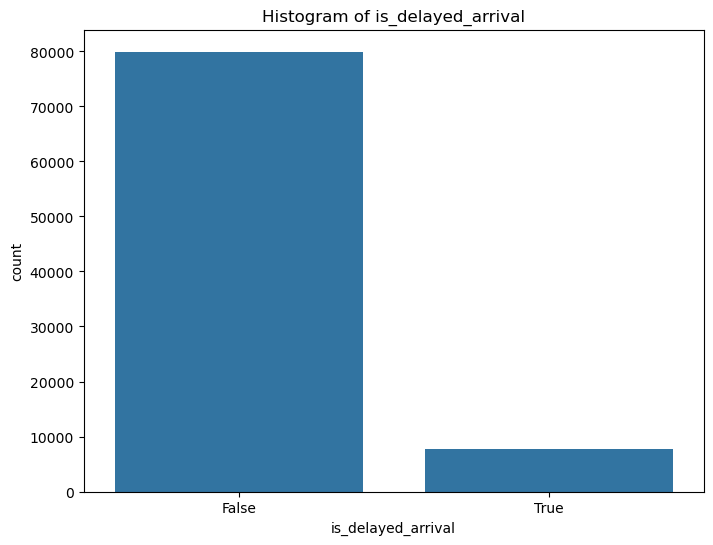

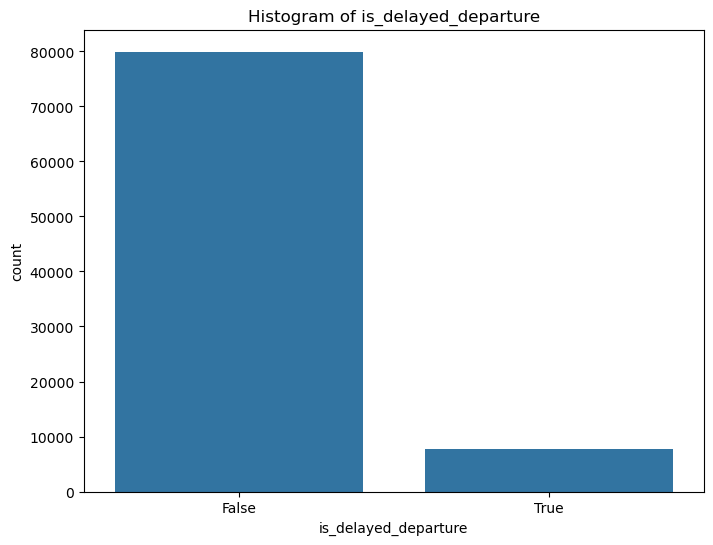

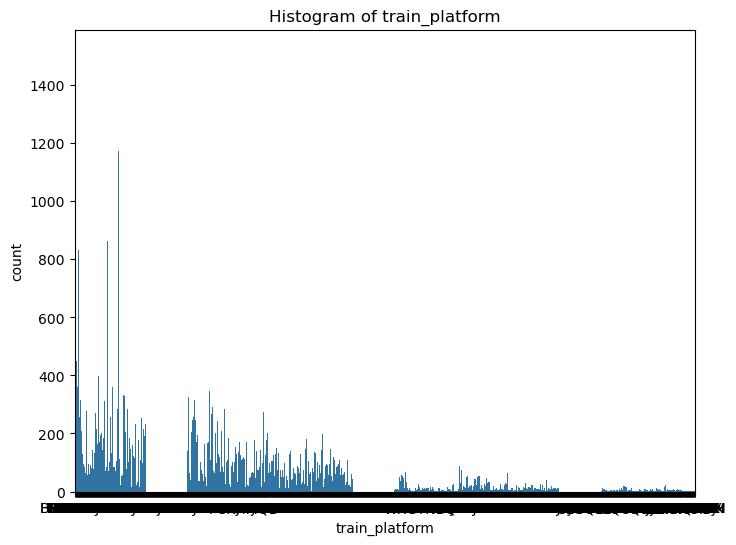

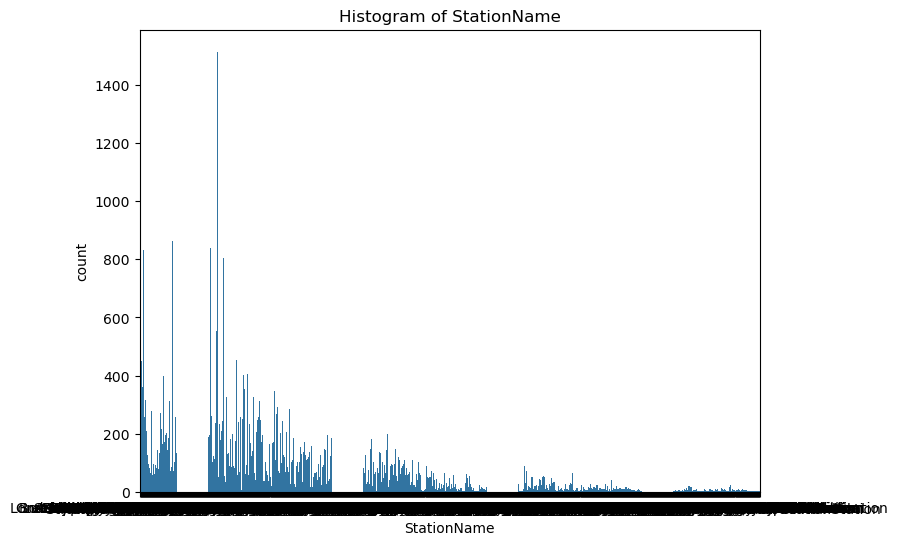

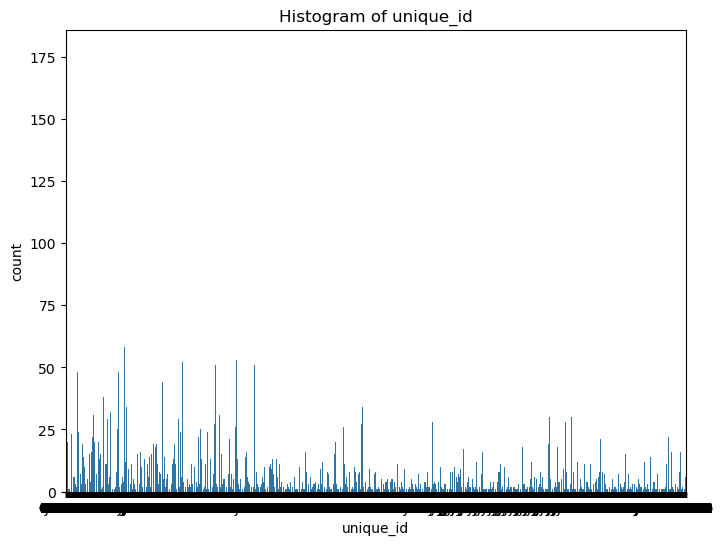

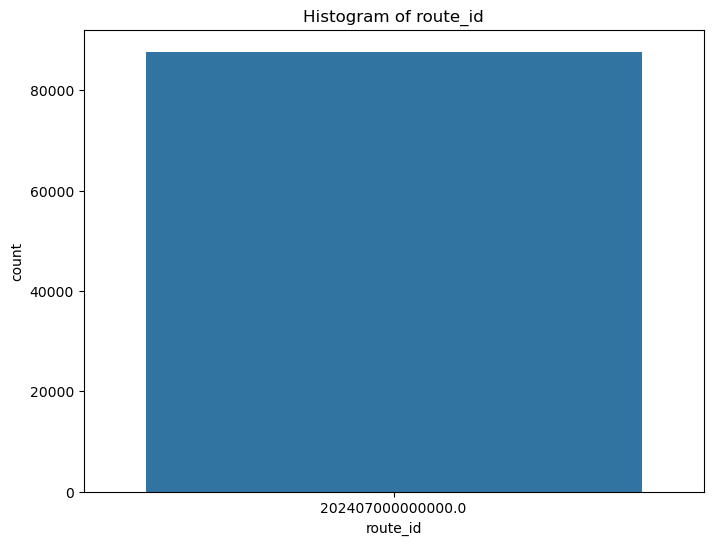

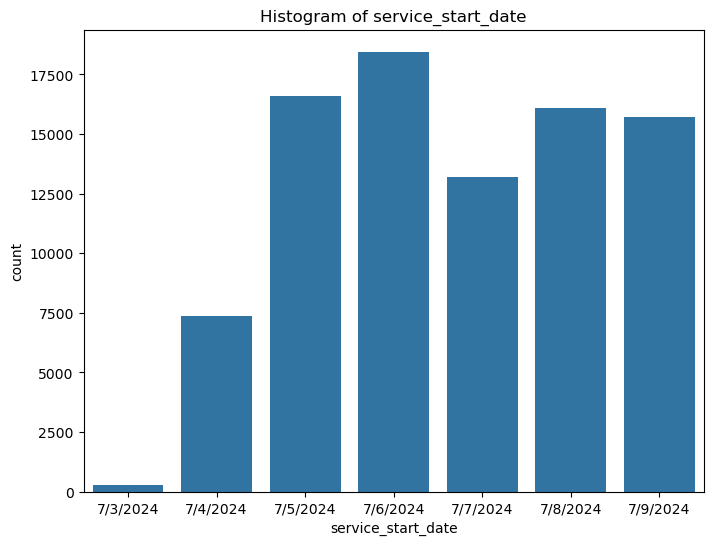

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleanRailData.csv')


#categorical and numerical columns
categorical_cols = ['is_delayed_arrival', 'is_delayed_departure', 'train_platform', 'StationName', 'unique_id','service_start_date']


#histograms for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Histogram of {col}')
    plt.show()



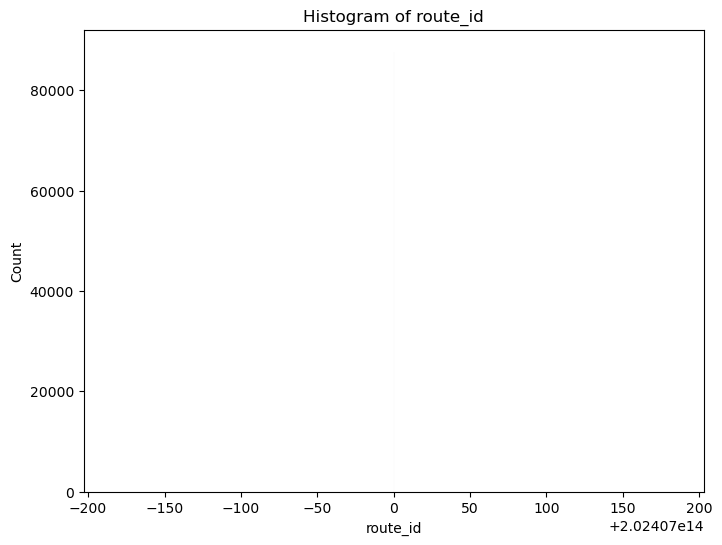

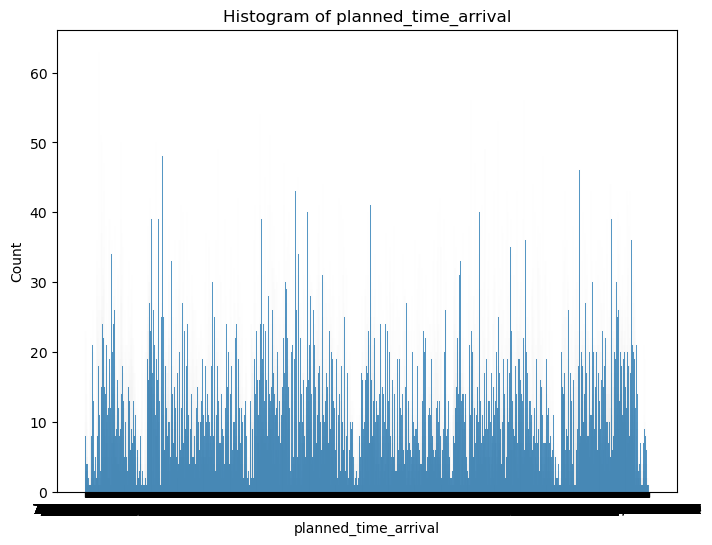

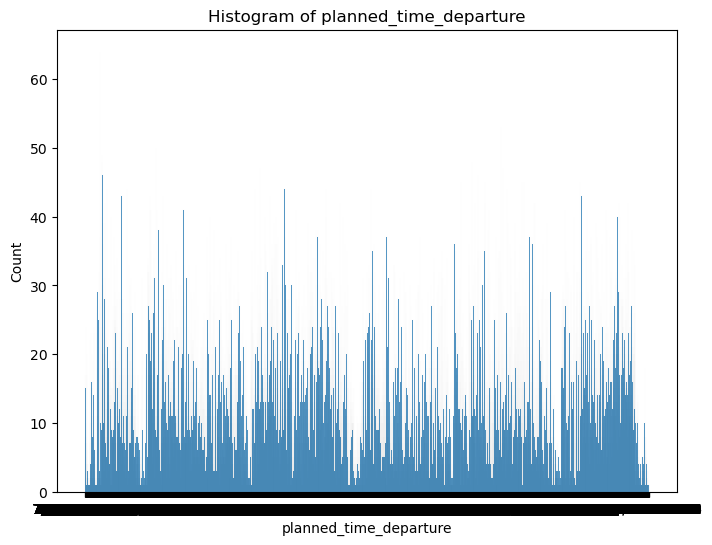

In [ ]:
#histograms for numerical variables
numerical_cols = ['planned_time_arrival', 'planned_time_departure', 'actual_arrival_time', 'actual_departure_time', 'delayed_arrival_min', 'delayed_departure_min']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=10)
    plt.title(f'Histogram of {col}')
    plt.show()